In [73]:
% matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
import numpy as np

<h1> P, NP, and Polynomial Verifiers: </h1>
<hr>

For looking at classic P and NP problems, I chose the following:

* NP: <a href="https://en.wikipedia.org/wiki/Subset_sum_problem"> Subset sum </a>
* P: <a href="https://en.wikipedia.org/wiki/Merge_sort"> Merge sort </a>

Sorting is a well studied problem with many efficient solutions. 
Merge sort represents a reliably fast, though memory hungry, solution 
to sort a collection. I had an implementation of Merge Sort sitting around
from the last algorithms class, so I found that and ran some tests. Here is the source:



In [74]:
"""
mergesort.py 
Logan Davis

    Part of my Mid-term

2/27/15 | Python 2.7 | MIT License 
"""
def mergesort(array):
    """
    This function merge sorts an array.
    Arguments (1):
        array = the list you with to have sorted.
    Returns (1):
        it returns a sorted version of array.
    ----------------------------------------------
    EXAMPLE:
    >>> array = [3,6,5,8,2,4556]
    >>> mergesort(array)
    [2,3,5,6,8,4556]
    """
    length = len(array)
    index_right,index_left,max_right,max_left = 0,0,0,0
    merged = False
    sorted_list = []
    if length <= 1:
        return array
    else:
        midpoint = length/2
        rightside = mergesort(array[midpoint:])
        leftside = mergesort(array[:midpoint])
        max_left = (len(leftside))
        max_right = (len(rightside))
        while not merged:
            if index_left != max_left and index_right != max_right:
                if leftside[index_left] < rightside[index_right]:
                    sorted_list.append((leftside[index_left]))
                    index_left += 1
                elif rightside[index_right] < leftside[index_left]:
                    sorted_list.append((rightside[index_right]))
                    index_right += 1
                elif leftside[index_left] == rightside[index_right]:
                    sorted_list.append(rightside[index_right])
                    sorted_list.append(leftside[index_left])
                    index_right += 1
                    index_left += 1
            elif index_left == max_left and index_right != max_right:
                sorted_list.append(rightside[index_right])
                index_right += 1
            elif index_left != max_left and index_right == max_right:
                sorted_list.append(leftside[index_left])
                index_left += 1
            else:
                merged = True
        return sorted_list

This function was tested on collections ranging from 1 to 9999. For each length, the sort was run 5 times and an average was taken. The implemented tests source is as follows:

In [75]:
import time, random, mergesort

def timeFunction(n,repeats):
    results = []

    f = open("resultsP.txt","w")

    for i in range(n):
        times = []
        array = random.sample(range(1, 10000), i)
        print("testing length {}.".format(i))
        for i in range(repeats):
            startTime = time.time()
            mergesort.mergesort(array)
            times.append(time.time() - startTime)
        average = sum(times)/repeats
        results.append(str(average) + "\n")
        f.write(str(results[-1]))
    f.close()

#timeFunction(10000,5) #Uncomment to run

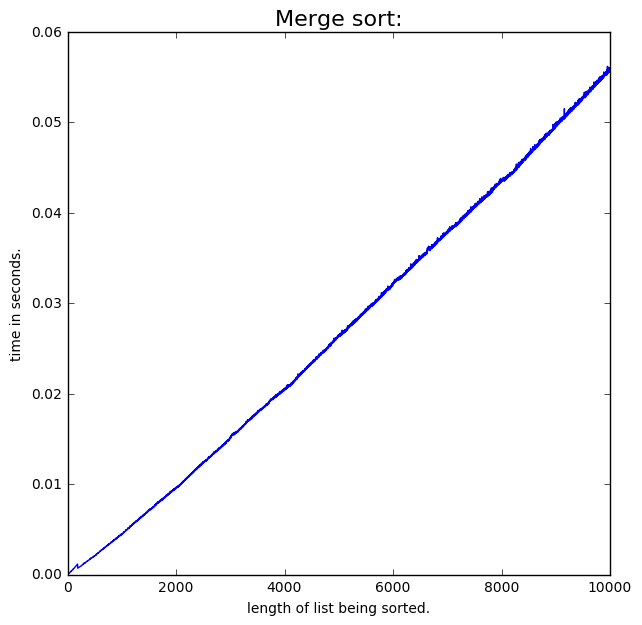

In [76]:
ptimes = open("resultsP.txt","r")
plt.figure(figsize=(7,7),dpi=600)
plt.xlabel('length of list being sorted.')
plt.ylabel('time in seconds.')
plt.title("Merge sort:", fontsize=16)
plt.plot(list(range(1,10001)),list(map(float,filter(None,ptimes.read().split("\n")))))


The growth of this algorithm is n log n and, therefore, runs in polynomial time. 
Given that, Merge Sort is an example that sorting is a P-class problem.

In exploring a NP problems, I chose the Subset Sum Problem (Sipser page 291). Here is the source code for my solution:

In [77]:
"""
subsetSum.py
Logan Davis

DESCRIPTION:
    Finds a subset of a given set that sums to 0
    example: 
        starting set = {1,3,6,5,-10}
        solution subset = {1,3,6,-10}
            because sum(subset) = 0
            
HOW TO USE:
    run from the command line passing:
    $ python subsetSum.py <a series of numbers seperated by spaces>
    
    Example:
    $ python subsetSum.py 1 5 3 -10 7
    0-Sum FOUND: [3,-10,7]
    
11/16/16 | Python 3.5 | MIT License
"""
import sys

def _subsetSum(setRemaining, subset = []):
    """
    recursively choses items from setRemaining
    to consider in a sum of subset in hopes of
    finding a 0-sum subset
    """
    if (sum(subset) == 0) and (subset != []):
        print("0-Sum FOUND: {}.".format(subset))
        quit()
    elif (setRemaining != []):
        for i in reversed(range(len(setRemaining))):
            newSetRemaining = setRemaining[:i+1]
            newSubset = subset[:]; newSubset.append(newSetRemaining.pop(i))
            _subsetSum(newSetRemaining,newSubset)

def findSubsetSum(setToTest):
    """
    a wrapper to handle default input and exit conditions
    of _subsetSum.
    
    If a 0-sum subset was found in setToTest,
    _subset will handle notifying the user that a valid
    subset was found. 
    
    If no 0-sum subset is found, this wrapper will
    handle notifying the user of such.
    """
    _subsetSum(setToTest,[])
    print("No 0-sum subsets were found.")

    
# Following code handles CL input, commented out to keep from running

#setToTest = []

#for i in range(1,len(sys.argv)):
#    setToTest.append(int(sys.argv[i]))
#findSubsetSum(setToTest)


The run-time testing of this function was similar in structure to that of the merge sort except for two things:

* The list tested on was a worst case scenario, a set that in no way could have a 0-sum subset in it. The worst and average case for merge sort is n log n. I thought it only fair to ensure worst case performance to this algorithm (as to further underscore it's NPness in runtime).

* Due to the growth in computational time, I was not able to test up to n=10000 like I did with Merge Sort. After 9 hours of running, subsetSum was only able to get to n=31. Though a small set, I feel it gets the point across.

Here is the code for the test:

In [78]:
import subprocess, time, random

def timeFunction(n,repeats,command):
    results = []
    teststring = ""

    f = open("results.txt","w")

    for i in range(n):
        teststring += str(random.randrange(0,10000)) + " "
        times = []
        print("Testing on string {}.",list(filter(None,teststring.split(" "))))
        for i in range(repeats):
            startTime = time.time()
            subprocess.call(command.split(" ")+list(filter(None, teststring.split(" "))))
            times.append(time.time() - startTime)
        average = sum(times)/repeats
        results.append(str(average) + "\n")
        f.write(str(results[-1]))
    f.close()

#timeFunction(40,5,"python subsetSum.py") #uncomment if you want to run the test.

The results of the 31 tests are as follows:

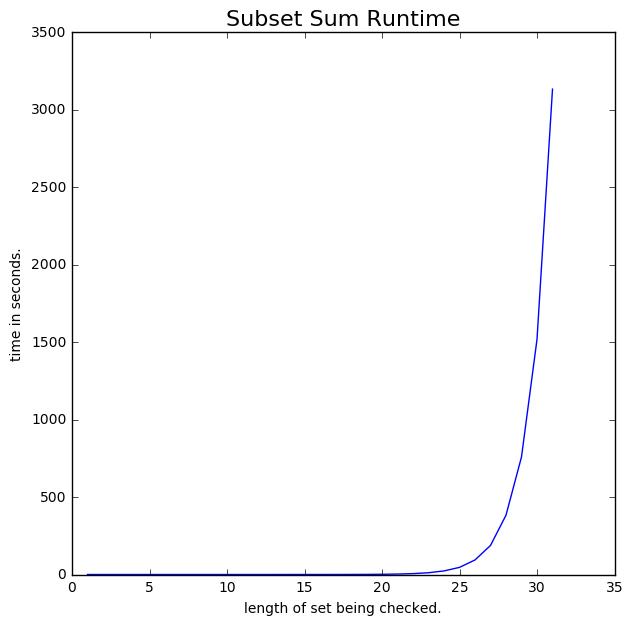

In [79]:
npTimes = open("resultsNP.txt","r")
plt.figure(figsize=(7,7),dpi=600)
plt.xlabel('length of set being checked.')
plt.ylabel('time in seconds.')
plt.title("Subset Sum Runtime", fontsize=16)
plt.plot(list(range(1,32)),list(map(float,filter(None,npTimes.read().split("\n")))))


Trying to create a polynomial verifier (some program that can tell if, not find, a NP solution is correct in polynomial time) is very straightforward for this problem. Here is the source code:

In [80]:
"""
polynomialVerifier.py
Logan Davis

DESCRIPTION:
    Verifies whether a set sums to 0.
11/16/16 | Python 3.5 | MIT License
"""

def zeroSumVerifier(zeroSumCandidate):
    """
    returns True if list zeroSumCandidate
    sums to 0 and the list is not empty.

    else, returns False (sums to some 
    non-zero value).
    """
    sumOfList = 0
    if zeroSumCandidate == []:
        return False
    for i in zeroSumCandidate:
        sumOfList += i

    if sumOfList == 0:
        return True
    else:
        return False

Again, a similar test was used to catalog time. This time I generate correct values in an attempt to cheer myself up given that testing for expected correctness in more optimistic than the opposite. The values actually computed by the Subset Sum finder where far too few to use, given how fast the verifier is. So all tested sets where generated programmatically from 0 to 20000 (stepping by 2 in length, as to still sum to 0):

In [81]:
def timeFunction(n,repeats):
    results = ""
    testSolution = []

    for i in range(n):
        testSolution += [5,-5]
        times = []
        for i in range(repeats):
            startTime = time.time()
            zeroSumVerifier(testSolution)
            times.append(time.time() - startTime)
        average = sum(times)/repeats
        results += str(average) + "\n"
    
    f = open("resultsNPverifier.txt","w")
    f.write(results)
    f.close()

timeFunction(10000,5)

Something to keep in mind is that at these speed, system overhead has very noticable effect on repeated tests. The majority of points lay on a linear line and in the code for the function, it is obvious that in only goes through the length on the set once. Here is the time graph:

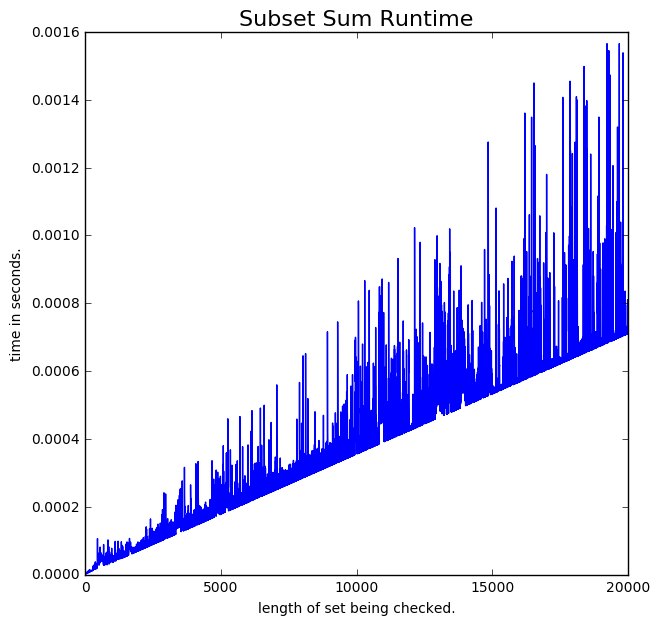

In [83]:
pverifyTimes = open("resultsNPverifier.txt","r")
plt.figure(figsize=(7,7),dpi=600)
plt.xlabel('length of set being checked.')
plt.ylabel('time in seconds.')
plt.title("Subset Sum Runtime", fontsize=16) 
plt.plot(list(range(1,20001,2)),list(map(float,filter(None,pverifyTimes.read().split("\n")))))